### Question 1 Provide a visual representation of our annual sales performance over time?


In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
connection = mysql.connector.connect(user='root',
                                    host='localhost',
                                    password='1234',
                                    database='swiftmarket')

In [4]:
query = """SELECT
MONTHNAME(SaleDate) AS Month,
SUM(TotalPrice) AS DailySales
FROM Salesdata
GROUP BY MONTH(SaleDate),MONTHNAME(SaleDate)
ORDER BY MONTH(SaleDate),MONTHNAME(SaleDate);
"""

In [5]:
cursor = connection.cursor()

In [6]:
cursor.execute(query)
rows = cursor.fetchall()

In [7]:
df= pd.DataFrame(data=rows,columns=cursor.column_names)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       12 non-null     object
 1   DailySales  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [9]:
df_sorted = df.sort_values(by='DailySales',ascending=False)

In [10]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.hot(seq)

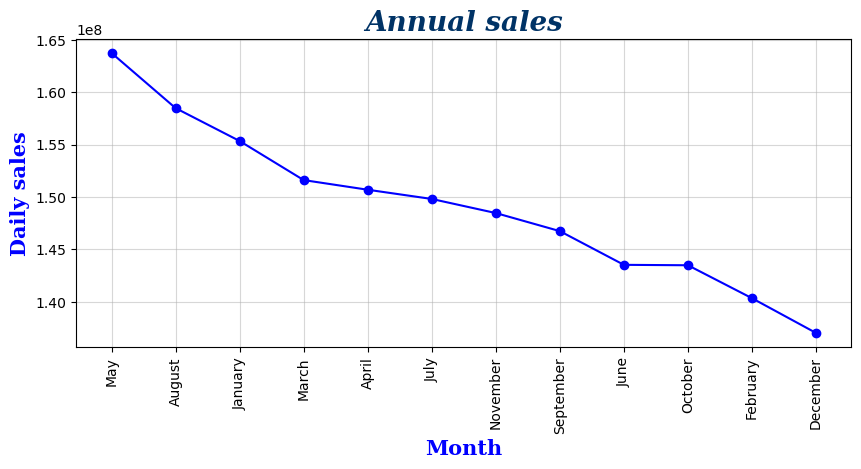

In [11]:
font = {'family': 'serif',
        'color':  '#003366',
        'weight': 'bold',
        'size': 20,
       'style':'italic'}

font2 = {'family': 'serif',
        'color':  '#0000FF',
        'weight': 'bold',
        'size': 15,}

plt.figure(figsize=(10,4))

plt.title('Annual sales',fontdict=font)

plt.plot(df_sorted['Month'],
         df_sorted['DailySales'],
         color='#0000FF',marker='o')

plt.xlabel('Month',fontdict=font2)
plt.ylabel('Daily sales',fontdict=font2)

plt.grid(alpha=0.5)
plt.xticks(rotation=90)
plt.show()

### Question 2 The client is interested in understanding how the sales have been fluctuating over time to identify any underlying patterns or anomalies Analyze  the trend in our monthly sales using a moving average technique .

In [12]:
query = """select
months,
AVG(monthlysales) OVER (ORDER BY monthnum ROWS BETWEEN 3
PRECEDING AND CURRENT ROW) AS MovingAverage
from
(SELECT
month(saledate) monthnum,
monthname(SaleDate) as months,
sum(totalprice) as monthlysales
FROM Salesdata
Group by month(saledate),monthname(saledate)) t;"""

In [13]:
cursor.execute(query)
rows = cursor.fetchall()

In [14]:
df =pd.DataFrame(data=rows,columns=cursor.column_names)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   months         12 non-null     object
 1   MovingAverage  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [16]:
df['MovingAverage'] = df['MovingAverage'].astype(float)

In [17]:
df_sorted = df.sort_values(by='MovingAverage',ascending=False)

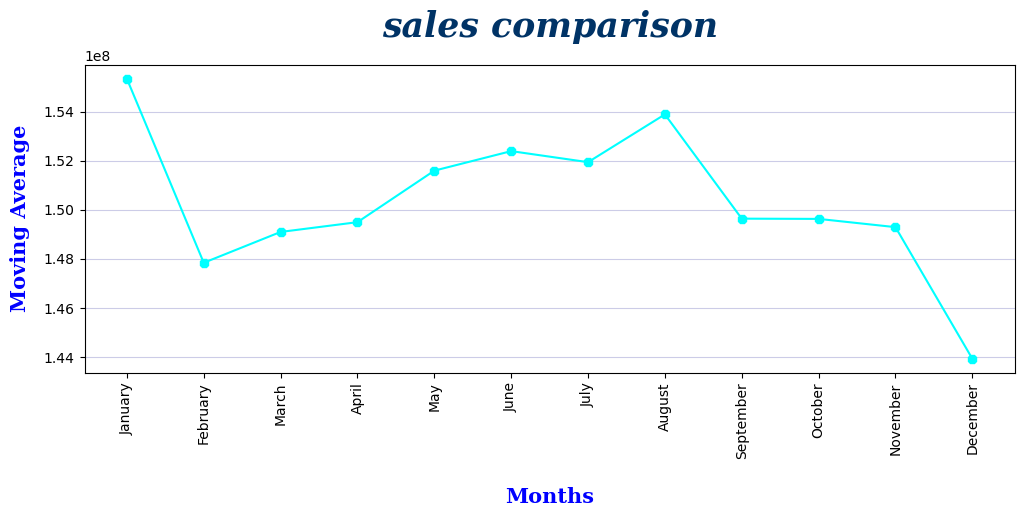

In [18]:
font = {'family': 'serif',
        'color':  '#003366',
        'weight': 'bold',
        'size': 25,
       'style':'italic'}

font2 = {'family': 'serif',
        'color':  '#0000FF',
        'weight': 'bold',
        'size': 15,}

plt.figure(figsize=(12,4))

plt.title('sales comparison',fontdict=font,pad=20)

plt.plot(df['months'],
         df['MovingAverage'],
        color='#00FFFF',
         marker='8'
        )

plt.xlabel('Months',fontdict=font2,labelpad=20)
plt.ylabel('Moving Average',fontdict=font2,labelpad=10)

plt.grid(axis='y',alpha=0.2,color='darkblue')



plt.xticks(rotation=90)
plt.show()

### 3. Explore the month-over-month growth rate in sales


In [19]:
query="""SELECT
MONTH(SaleDate) AS Monthnum,
monthname(saledate) as months,
100*(SUM(TotalPrice) - LAG(SUM(TotalPrice)) OVER (ORDER BY
MONTH(SaleDate)))/
LAG(SUM(TotalPrice)) OVER (ORDER BY MONTH(SaleDate))AS
'growthrate in %'
FROM Salesdata
GROUP BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate)
ORDER BY YEAR(SaleDate), MONTH(SaleDate),monthname(saledate);
"""

In [20]:
cursor.execute(query)
rows = cursor.fetchall()

In [21]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Monthnum         12 non-null     int64 
 1   months           12 non-null     object
 2   growthrate in %  11 non-null     object
dtypes: int64(1), object(2)
memory usage: 420.0+ bytes


In [23]:
df['Monthnum'] = df['Monthnum'].astype(float)

In [24]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.cool(seq)

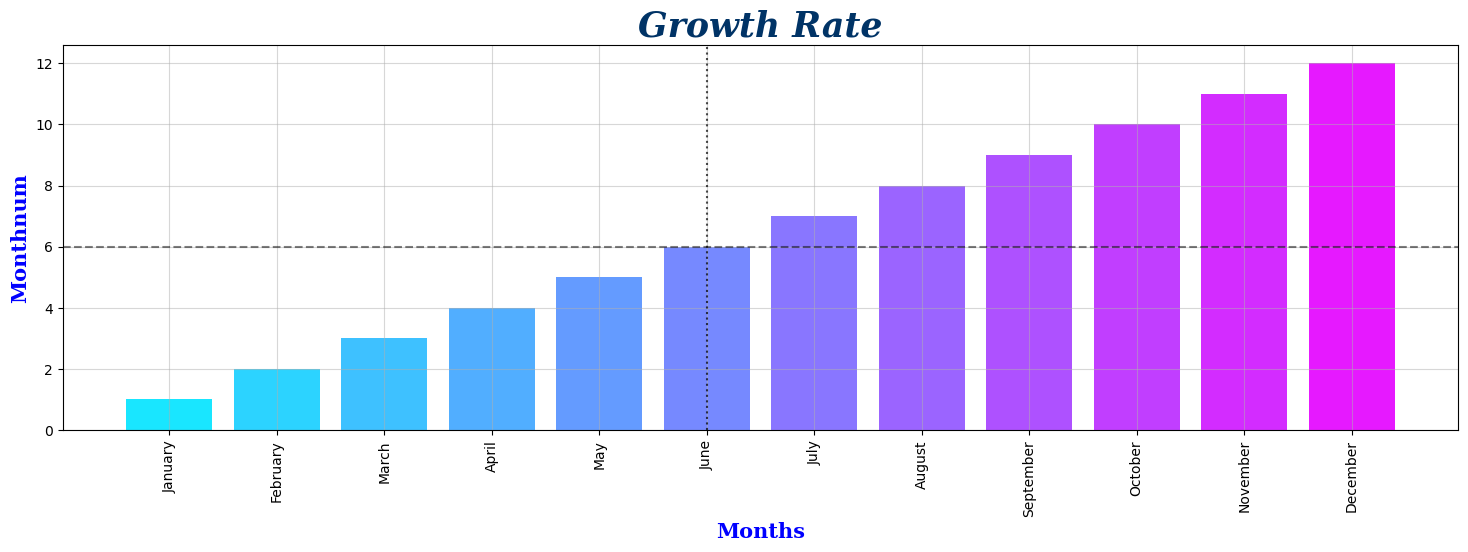

In [25]:

plt.figure(figsize=(18,5))
plt.bar(df['months'],
        df['Monthnum'],
       color=cm)

plt.title('Growth Rate',fontdict=font)


plt.axhline(y=6,ls='dashed',alpha=0.5,color='black')
plt.axvline(x=5,ls='dotted',color='black',alpha=0.7)

plt.xlabel('Months',fontdict=font2)
plt.ylabel('Monthnum',fontdict=font2)

plt.grid(alpha=0.5)
plt.xticks(rotation=90)

plt.show()

### Question 4 identify the top-performing sales representatives based on their total sales volume

In [26]:
query = """select t.employeeid,e.firstname,t.totalsales
from
(select employeeid,sum(totalprice) as totalsales
from salesdata
group by EmployeeID) t
join employees e
on t.employeeid=e.EmployeeID
order by t.totalsales desc
limit 15;"""

In [27]:
cursor.execute(query)
rows = cursor.fetchall()

In [28]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   employeeid  15 non-null     int64 
 1   firstname   15 non-null     object
 2   totalsales  15 non-null     object
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


In [30]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.winter(seq)

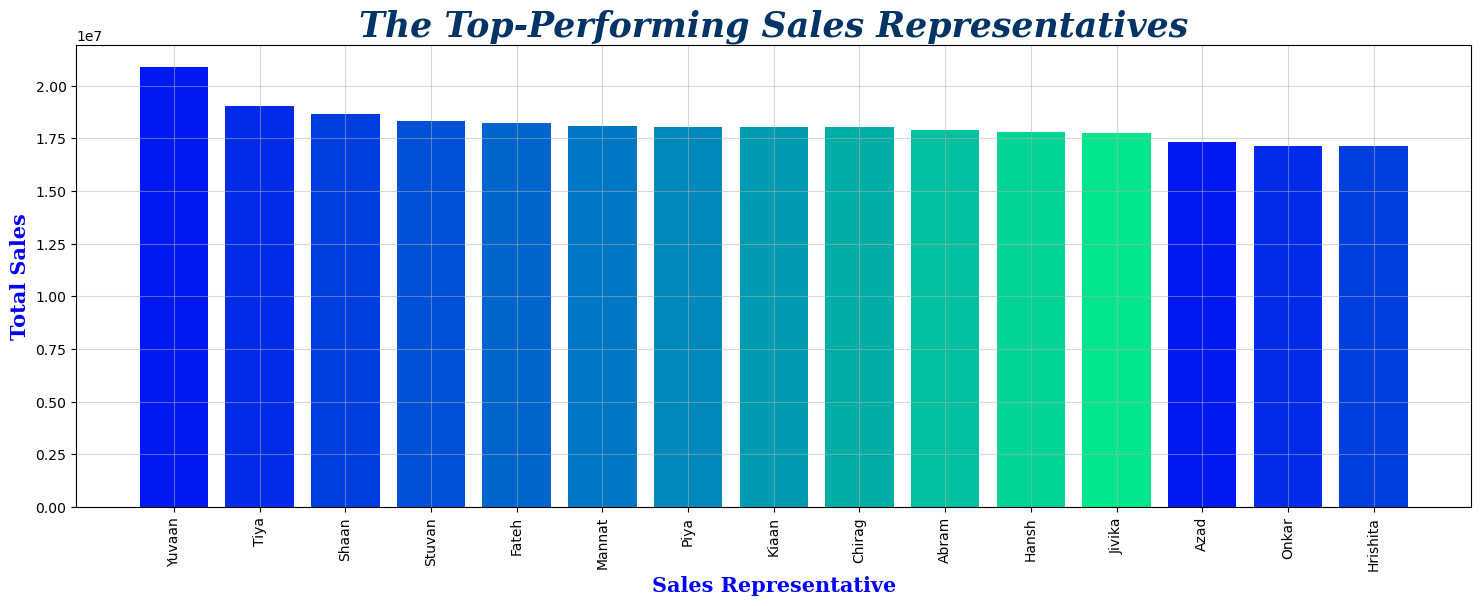

In [31]:
font = {'family': 'serif',
        'color':  '#003366',
        'weight': 'bold',
        'size': 25,
       'style':'italic'}

font2 = {'family': 'serif',
        'color':  '#0000FF',
        'weight': 'bold',
        'size': 15,}

plt.figure(figsize=(18,6))
plt.bar(df['firstname'],
        df['totalsales'],
        color=cm)

plt.title('The Top-Performing Sales Representatives',fontdict=font)
plt.xlabel('Sales Representative',fontdict=font2)
plt.ylabel('Total Sales',fontdict=font2)
plt.xticks(rotation=90)

plt.grid(alpha=0.5)

plt.show()

### Question 5 What are the total sales made by each employee?

In [32]:
query="""SELECT
EmployeeID,
SUM(TotalPrice) AS TotalSales
FROM Salesdata
GROUP BY EmployeeID
limit 10;"""

In [33]:
cursor.execute(query)
rows = cursor.fetchall()

In [34]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.summer(seq)

In [35]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  10 non-null     int64 
 1   TotalSales  10 non-null     object
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [37]:
df['EmployeeID'] = df['EmployeeID'].astype(float)

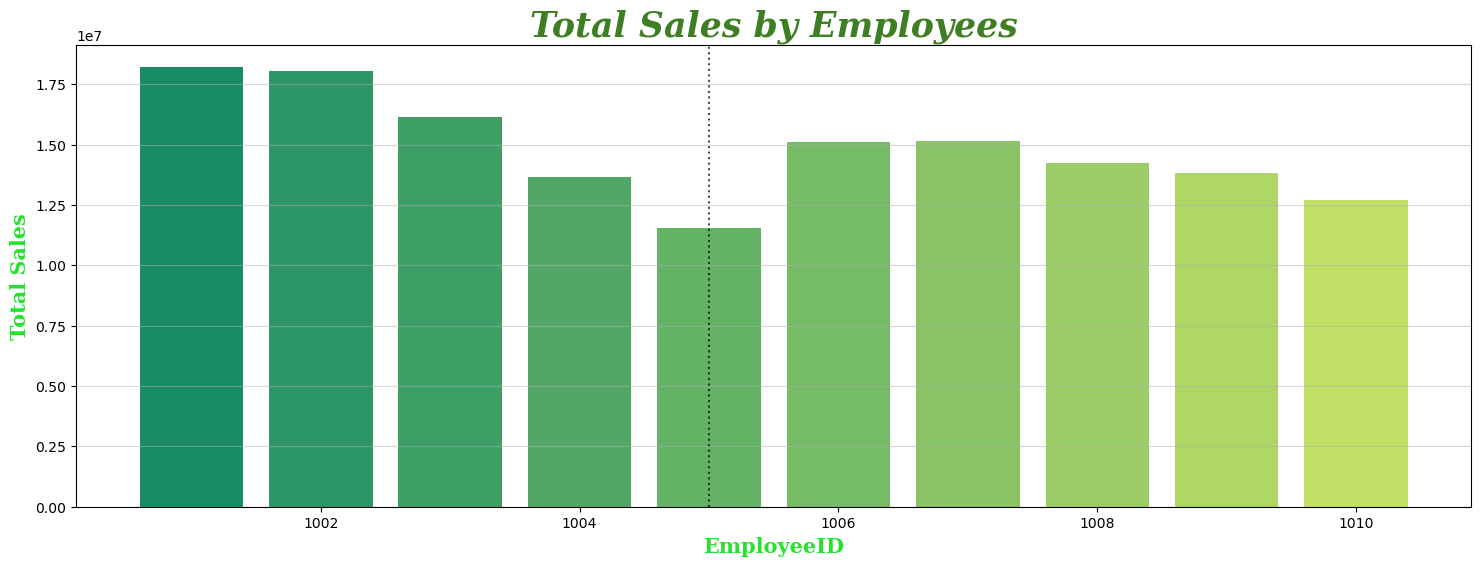

In [38]:
font = {'family': 'serif',
        'color':  '#3f7f24',
        'weight': 'bold',
        'size': 25,
       'style':'italic'}

font2 = {'family': 'serif',
        'color':  '#25e22d',
        'weight': 'bold',
        'size': 15,}

plt.figure(figsize=(18,6))
plt.bar(df['EmployeeID'],
        df['TotalSales'],
        color=cm)

plt.xlabel('EmployeeID',fontdict=font2)
plt.ylabel('Total Sales',fontdict=font2)
plt.title('Total Sales by Employees',fontdict=font)

plt.axvline(x=1005,ls='dotted',color='black',alpha=0.7)

plt.grid(axis='y',alpha=0.5)

plt.show()

### question 6 Which category has the highest total sales?

In [39]:
query="""SELECT
c.CategoryName,
SUM(s.TotalPrice) AS TotalSales
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Categories c ON sc.CategoryID = c.CategoryID
GROUP BY c.CategoryName
ORDER BY TotalSales DESC
LIMIT 8;
"""

In [40]:
cursor.execute(query)
rows = cursor.fetchall()

In [41]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [42]:
df

,CategoryName,TotalSales
0,Pet Supplies and Accessories,361848986.00
1,Health and Wellness Products,324761329.00
2,Electronics and Gadgets,319374417.00
3,Books and Educational Materials,282897933.00
4,Home and Kitchen Appliances,269316684.00
5,Outdoor and Sports Equipment,231074739.00


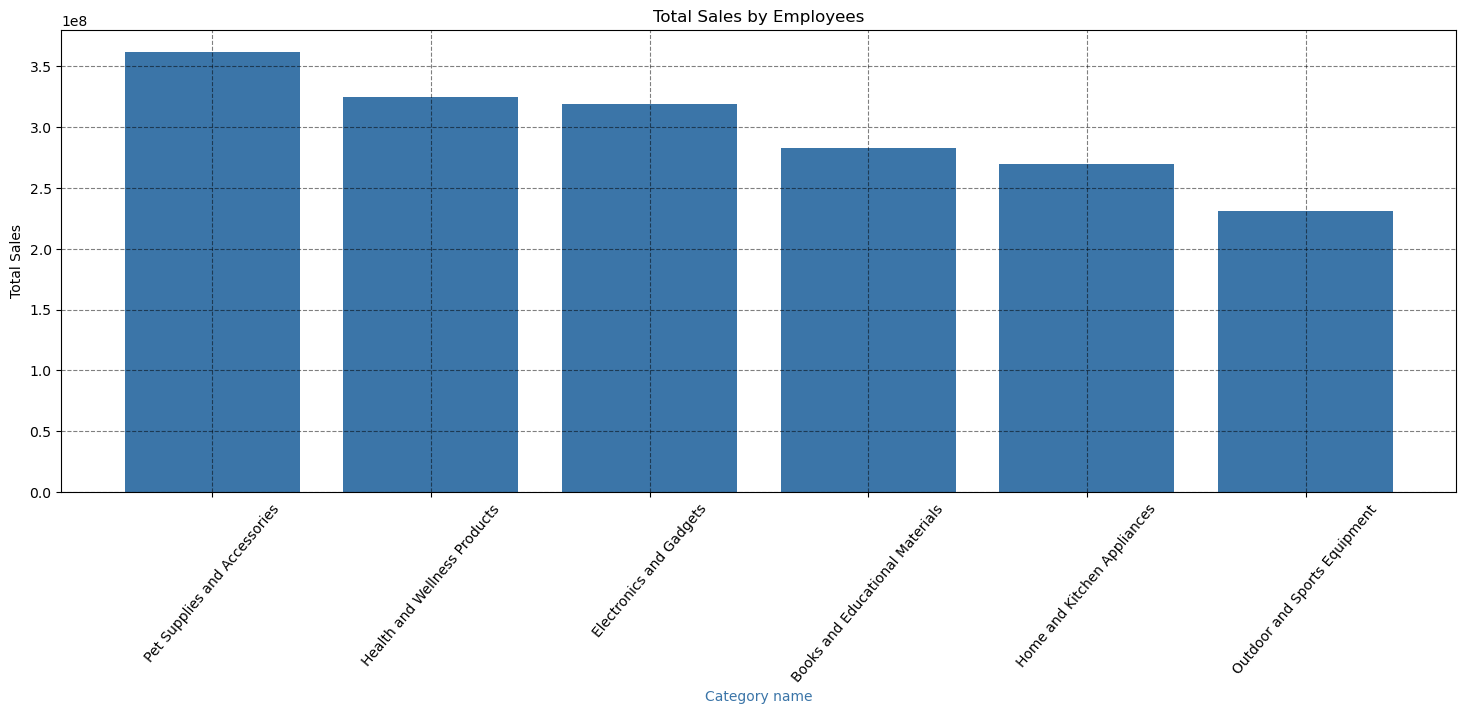

In [43]:
plt.figure(figsize=(18,6))
plt.bar(df['CategoryName'],
        df['TotalSales'],
        color='#3b75a8')

plt.xlabel('Category name',color='#3b75a8')
plt.ylabel('Total Sales',)
plt.title('Total Sales by Employees',)

plt.grid(alpha=0.5,color='black',ls='dashed')
plt.xticks(rotation=50)

plt.show()

### Question 7 How many customers are there in each state?


In [44]:
query = """SELECT
State,
COUNT(*) AS TotalCustomers
FROM Customers
GROUP BY State
ORDER BY TotalCustomers desc;"""

In [45]:
cursor.execute(query)
rows = cursor.fetchall()

In [46]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.bone(seq)

In [47]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           21 non-null     object
 1   TotalCustomers  21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


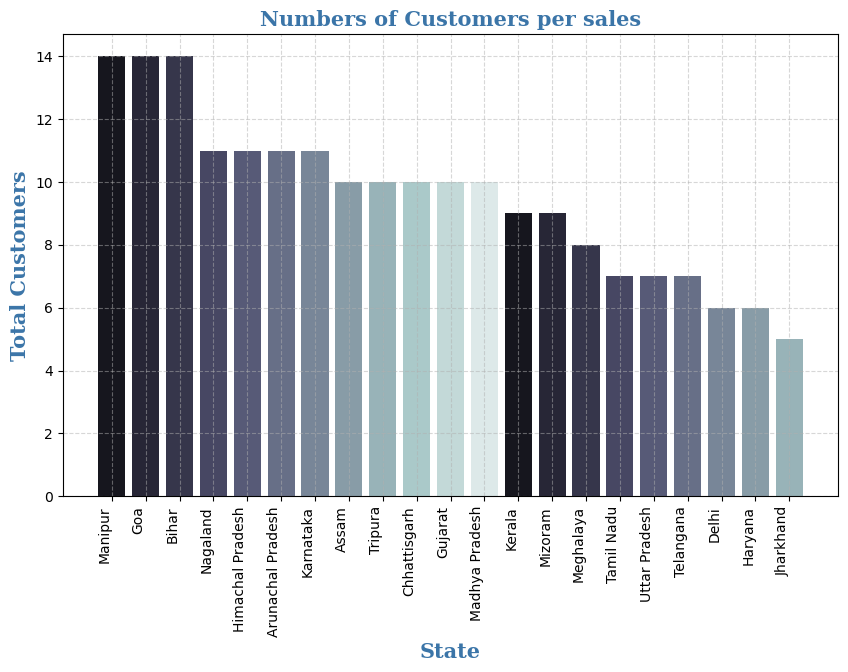

In [49]:
font2 = {'family': 'serif',
        'color':  '#3b75a8',
        'weight': 'bold',
        'size': 15,}


plt.figure(figsize=(10,6))
plt.bar(df['State'],
        df['TotalCustomers'],
        color=cm)

plt.xlabel('State',fontdict=font2)
plt.ylabel('Total Customers',fontdict=font2)
plt.title('Numbers of Customers per sales',fontdict=font2)

plt.grid(alpha=0.5,ls='dashed')
plt.xticks(rotation=90,ha='right')

plt.show()

### Question 8. What is the average quantity of each product sold?


In [50]:
query="""SELECT
s.SubcatID,
sb.SubcatName,
AVG(Quantity) AS AvgQuantitySold
FROM Salesdata s
join subcategories sb on s.subcatid=sb.SubcatID
GROUP BY s.SubcatID,sb.subcatname;
"""

In [51]:
cursor.execute(query)
rows = cursor.fetchall()

In [52]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.winter(seq)

In [53]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SubcatID         30 non-null     int64 
 1   SubcatName       30 non-null     object
 2   AvgQuantitySold  30 non-null     object
dtypes: int64(1), object(2)
memory usage: 852.0+ bytes


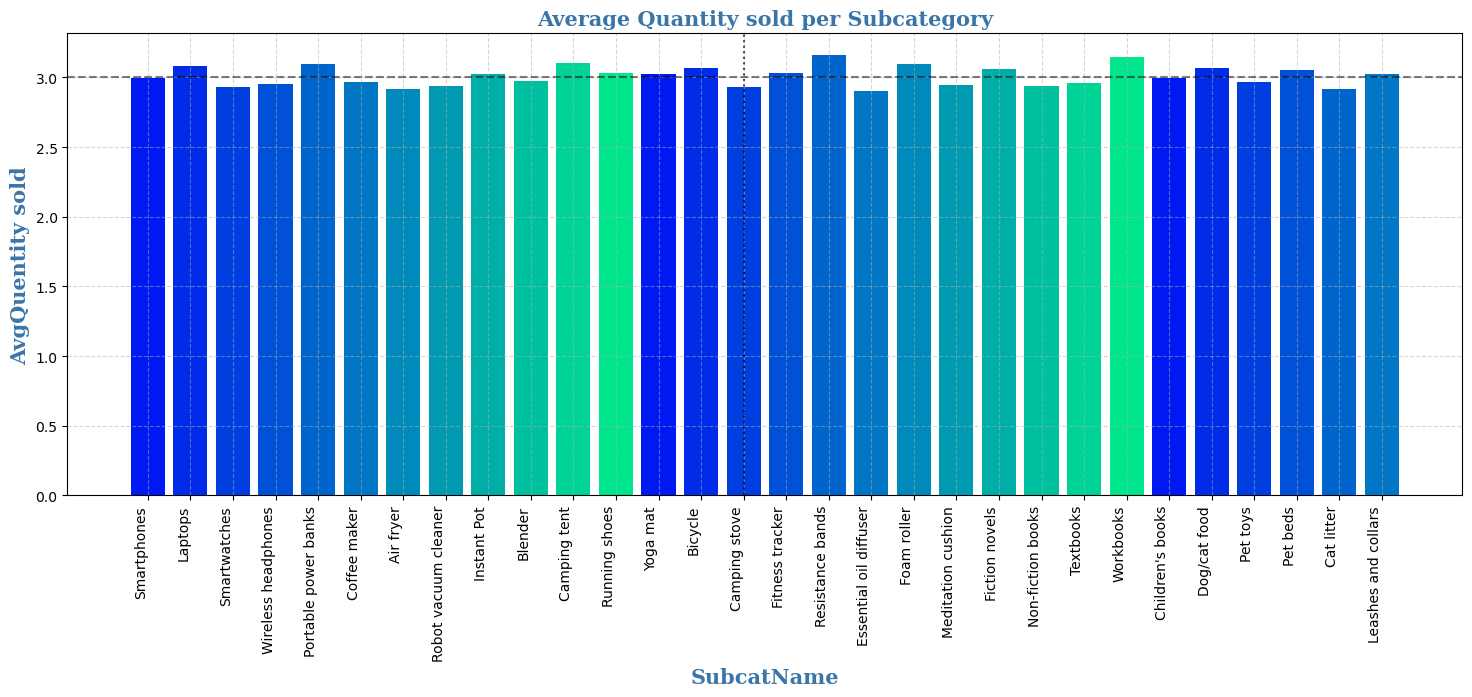

In [55]:
plt.figure(figsize=(18,6))
plt.bar(df['SubcatName'],
        df['AvgQuantitySold'],
        color=cm)

plt.xlabel('SubcatName',fontdict=font2)
plt.ylabel('AvgQuentity sold',fontdict=font2)
plt.title('Average Quantity sold per Subcategory',fontdict=font2)

plt.axhline(y=3,ls='dashed',alpha=0.5,color='black')
plt.axvline(x=14,ls='dotted',color='black',alpha=0.7)

plt.grid(alpha=0.5,ls='dashed')
plt.xticks(rotation=90,ha='right')

plt.show()

### Question 9. Which supplier has the highest total sales?


In [56]:
query = """SELECT
SupplierName,
SUM(TotalPrice) AS TotalSales
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Suppliers su ON sc.SupplierID = su.SupplierID
GROUP BY SupplierName
ORDER BY TotalSales DESC
LIMIT 10;
"""

In [57]:
cursor.execute(query)
rows = cursor.fetchall()

In [58]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SupplierName  10 non-null     object
 1   TotalSales    10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [60]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.winter(seq)

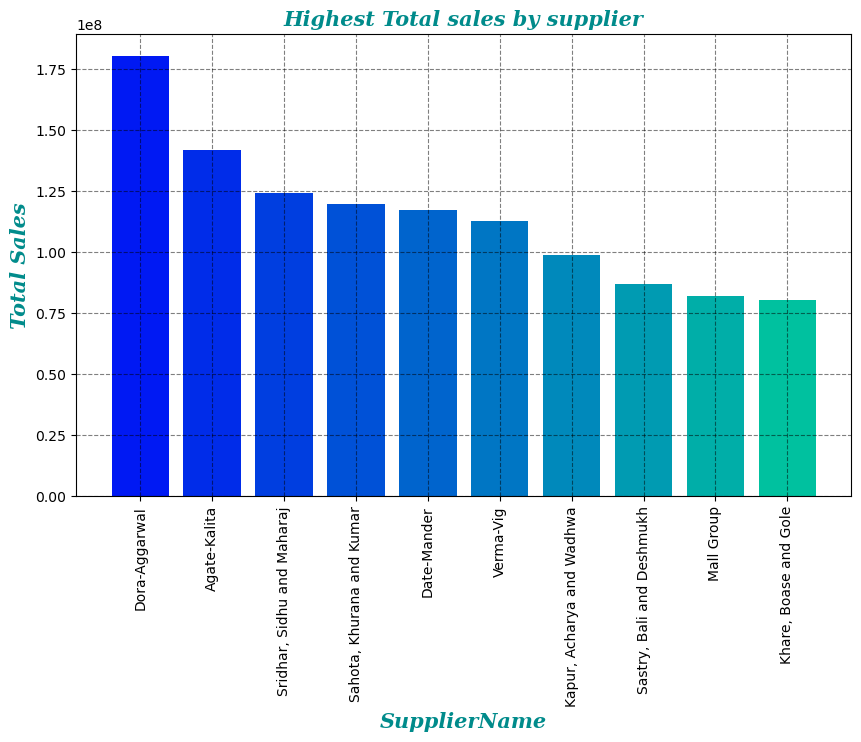

In [61]:
font = {'family': 'serif',
        'color':  '#008B8B',
        'weight': 'bold',
        'size': 15,
       'style':'italic'}


plt.figure(figsize=(10,6))
plt.bar(df['SupplierName'],
        df['TotalSales'],
        color=cm)

plt.xlabel('SupplierName',fontdict=font)
plt.ylabel('Total Sales',fontdict=font)
plt.title("Highest Total sales by supplier",
          fontdict=font)

plt.grid(alpha=0.5,color='black',
         ls='dashed')

plt.xticks(rotation=90)
plt.show()

### Question 10 What is the total revenue generated from sales in each state?


In [62]:
query="""SELECT
c.State,
SUM(s.TotalPrice) AS TotalRevenue
FROM Salesdata s
JOIN Customers c ON s.CustomerID = c.CustomerID
GROUP BY c.State;"""

In [63]:
cursor.execute(query)
rows = cursor.fetchall()

In [64]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         21 non-null     object
 1   TotalRevenue  21 non-null     object
dtypes: object(2)
memory usage: 468.0+ bytes


In [66]:
df

,State,TotalRevenue
0,Assam,91371978.00
1,Tripura,92329290.00
2,Nagaland,91511008.00
3,Manipur,122908203.00
4,Kerala,84668321.00
5,Delhi,53744487.00
6,Mizoram,76073281.00
7,Haryana,51660214.00
8,Chhattisgarh,91546717.00
9,Himachal Pradesh,102905140.00


In [67]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.hot(seq)

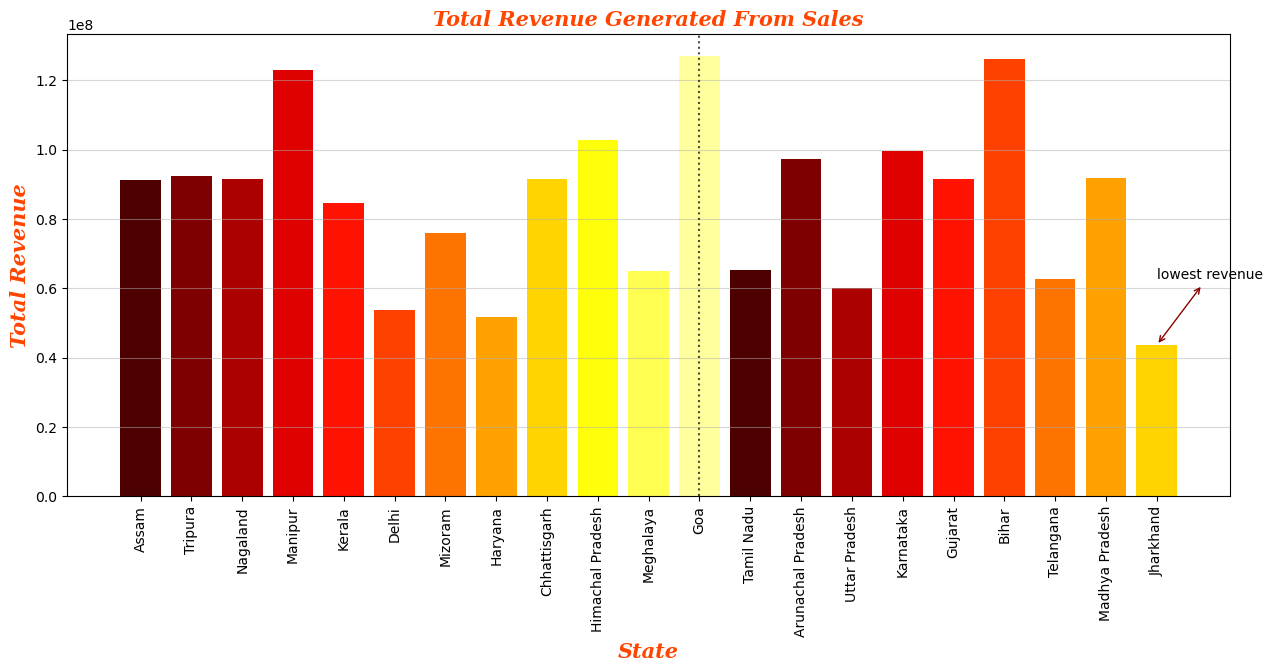

In [68]:
font = {'family': 'serif',
        'color':  '#FF4500',
        'weight': 'bold',
        'size': 15,
       'style':'italic'}


plt.figure(figsize=(15,6))
plt.bar(df['State'],
        df['TotalRevenue'],
        color=cm)

plt.xlabel('State',fontdict=font)
plt.ylabel('Total Revenue',fontdict=font)
plt.title("Total Revenue Generated From Sales",fontdict=font)

plt.annotate(xy=(20,43623711.00),xytext=(20,62742874.00),text='lowest revenue',
             arrowprops={'facecolor':'white',
                       'edgecolor':'darkred',
                       'arrowstyle': '<->'})
             #horizontalalignment='center',
                #verticalalignment='bottom'

plt.axvline(x=11,ls='dotted',color='black',alpha=0.7)

plt.grid(axis='y',alpha=0.5)
plt.xticks(rotation=90)

plt.show()


### Question 11 . How many sales were made by each customer?

In [69]:
query = """SELECT
s.CustomerID,
c.firstname,
COUNT(*) AS TotalSales
FROM Salesdata s
join customers c
on s.CustomerID=c.CustomerID
GROUP BY s.CustomerID,c.firstname
order by TotalSales desc
limit 15;"""

In [70]:
cursor.execute(query)
rows = cursor.fetchall()

In [71]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  15 non-null     object
 1   firstname   15 non-null     object
 2   TotalSales  15 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 492.0+ bytes


In [73]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.cool(seq)

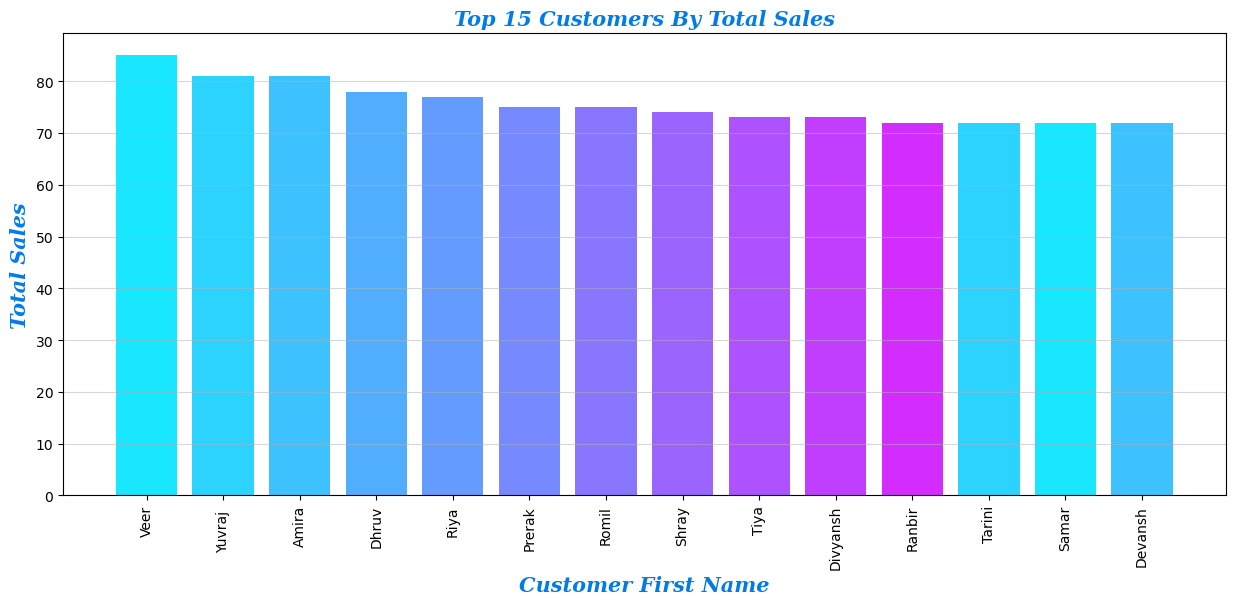

In [74]:
font = {'family': 'serif',
        'color':  '#007ce9',
        'weight': 'bold',
        'size': 15,
       'style':'italic'}

plt.figure(figsize=(15,6))
plt.bar(df['firstname'],
        df['TotalSales'],
        color=cm)


plt.xlabel('Customer First Name',fontdict=font)
plt.ylabel('Total Sales',fontdict=font)
plt.title("Top 15 Customers By Total Sales",fontdict=font)

plt.grid(axis='y',alpha=0.5)
plt.xticks(rotation=90)

plt.show()

### Question 12. What is the total salary expenditure on employees in each department?


In [75]:
query = """SELECT
Department,
SUM(Salary) AS TotalSalaryExpenditure
FROM Employees
GROUP BY Department;"""

In [76]:
cursor.execute(query)
rows = cursor.fetchall()

In [77]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Department              10 non-null     object
 1   TotalSalaryExpenditure  10 non-null     object
dtypes: object(2)
memory usage: 292.0+ bytes


In [79]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.autumn(seq)

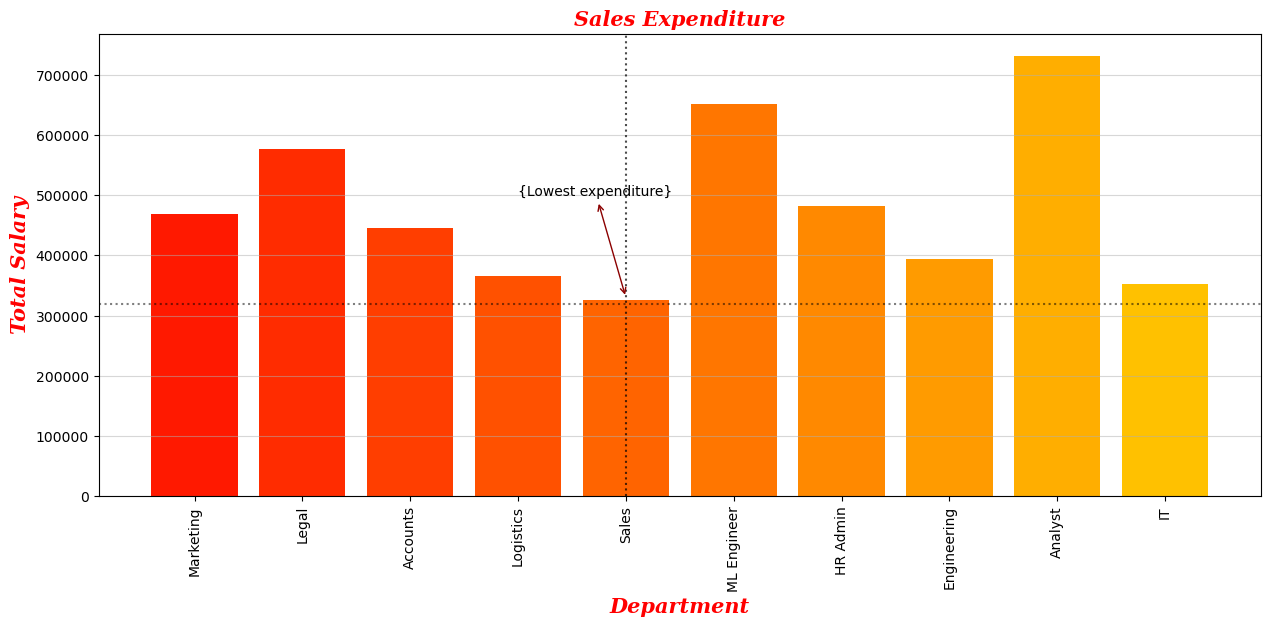

In [80]:
font = {'family': 'serif',
        'color':  '#FF0000',
        'weight': 'bold',
        'size': 15,
       'style':'italic'}

plt.figure(figsize=(15,6))
plt.bar(df['Department'],
        df['TotalSalaryExpenditure'],
        color=cm)
plt.grid(axis='y',alpha=0.5)
plt.xticks(rotation=90)

plt.annotate(xy=(4,330000),xytext=(3,500000),text='{Lowest expenditure}',
             arrowprops={'facecolor':'white',
                       'edgecolor':'darkred',
                       'arrowstyle': '<->'})

plt.axvline(x=4,ls='dotted',color='black',alpha=0.7)
plt.axhline(y=320000,ls='dotted',alpha=0.5,color='black') 

plt.xlabel('Department',fontdict=font)
plt.ylabel('Total Salary',fontdict=font)
plt.title("Sales Expenditure",fontdict=font)


plt.show()

### Question 13. Which subcategory has the highest average unit price?

In [81]:
query = """SELECT
SubcatName,
AVG(UnitPrice) AS AvgSellingPrice
FROM Subcategories
GROUP BY SubcatName
ORDER BY AvgSellingPrice DESC
LIMIT 10;"""

In [82]:
cursor.execute(query)
rows = cursor.fetchall()

In [83]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [84]:
seq = np.linspace(0.1,0.9,12)
cm = plt.cm.spring(seq)

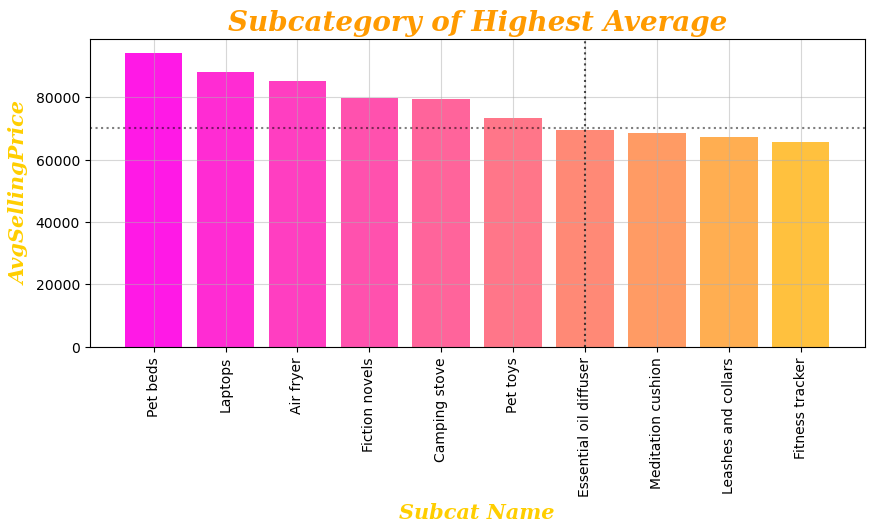

In [85]:
font = {'family': 'serif',
        'color':  '#ff9a00',
        'weight': 'bold',
        'size': 20,
       'style':'italic'}

font2 = {'family': 'serif',
        'color':  '#FFCE00',
        'weight': 'bold',
        'size': 15,
       'style':'italic'}

plt.figure(figsize=(10,4))
plt.bar(df['SubcatName'],
        df['AvgSellingPrice'],
        color=cm)


plt.xlabel('Subcat Name',fontdict=font2)
plt.ylabel('AvgSellingPrice',fontdict=font2)
plt.title("Subcategory of Highest Average",fontdict=font)

plt.axvline(x=6,ls='dotted',color='black',alpha=0.7)
plt.axhline(y=70000,ls='dotted',alpha=0.5,color='black')

plt.grid(alpha=0.5)
plt.xticks(rotation=90)


plt.show()

### Question 14. What is the total revenue generated from sales in each category?

In [92]:
query = """SELECT
c.CategoryName,
SUM(s.TotalPrice) AS TotalRevenue
FROM Salesdata s
JOIN Subcategories sc ON s.SubcatID = sc.SubcatID
JOIN Categories c ON sc.CategoryID = c.CategoryID
GROUP BY c.CategoryName;"""

In [93]:
cursor.execute(query)
rows = cursor.fetchall()

In [94]:
df = pd.DataFrame(data=rows,columns=cursor.column_names)

In [95]:
df

,CategoryName,TotalRevenue
0,Electronics and Gadgets,319374417.00
1,Home and Kitchen Appliances,269316684.00
2,Outdoor and Sports Equipment,231074739.00
3,Health and Wellness Products,324761329.00
4,Books and Educational Materials,282897933.00
5,Pet Supplies and Accessories,361848986.00


In [96]:
seq = np.linspace(0.1,0.9,9)
cm = plt.cm.winter(seq)

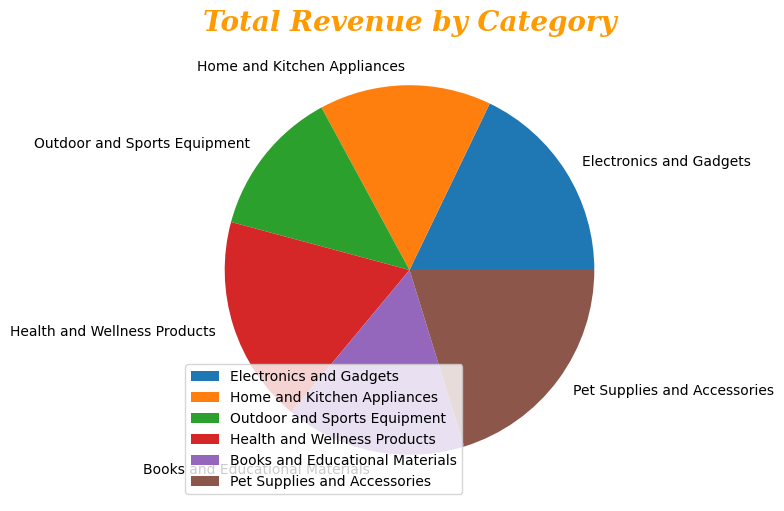

In [97]:
plt.figure(figsize=(6,6))
plt.pie(df['TotalRevenue'],
        labels=df['CategoryName'])

plt.title("Total Revenue by Category",fontdict=font)


plt.legend()
plt.show()